In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\elecproduction.csv")
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [3]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [14]:
model = Prophet(seasonality_mode='multiplicative',
               yearly_seasonality=False,
               weekly_seasonality=True,
               daily_seasonality=False,
               interval_width=0.95,
               changepoint_prior_scale=0.5,
               seasonality_prior_scale=10)

In [15]:
model.add_country_holidays(country_name='US')

In [16]:
model.fit(train)

13:56:04 - cmdstanpy - INFO - Chain [1] start processing
13:56:04 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = model.make_future_dataframe(periods=10, freq='M')

In [18]:
forecast = model.predict(future)

In [22]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1985-01-01,60.067096,58.207929,81.879500,60.067096,60.067096,0.0,0.0,0.0,0.0,...,0.170225,0.170225,0.170225,0.006364,0.006364,0.006364,0.0,0.0,0.0,70.291992
1,1985-02-01,60.255063,48.311855,72.113056,60.255063,60.255063,0.0,0.0,0.0,0.0,...,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,0.0,0.0,0.0,60.230131
2,1985-03-01,60.424840,48.241322,72.432437,60.424840,60.424840,0.0,0.0,0.0,0.0,...,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,0.0,0.0,0.0,60.399838
3,1985-04-01,60.612808,49.142056,72.756173,60.612808,60.612808,0.0,0.0,0.0,0.0,...,0.004497,0.004497,0.004497,0.004497,0.004497,0.004497,0.0,0.0,0.0,60.885383
4,1985-05-01,60.794712,48.777865,72.152894,60.794712,60.794712,0.0,0.0,0.0,0.0,...,0.002422,0.002422,0.002422,0.002422,0.002422,0.002422,0.0,0.0,0.0,60.941962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2011-10-31,100.546716,89.208562,112.307729,100.499677,100.590011,0.0,0.0,0.0,0.0,...,0.004497,0.004497,0.004497,0.004497,0.004497,0.004497,0.0,0.0,0.0,100.998874
323,2011-11-30,100.577844,88.539999,113.412182,100.517735,100.633755,0.0,0.0,0.0,0.0,...,0.002422,0.002422,0.002422,0.002422,0.002422,0.002422,0.0,0.0,0.0,100.821453
324,2011-12-31,100.610010,88.097913,112.185008,100.540390,100.681628,0.0,0.0,0.0,0.0,...,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,-0.003414,0.0,0.0,0.0,100.266576
325,2012-01-31,100.642176,89.377573,113.095532,100.559442,100.728928,0.0,0.0,0.0,0.0,...,0.006364,0.006364,0.006364,0.006364,0.006364,0.006364,0.0,0.0,0.0,101.282621


In [19]:
pred = forecast[['ds', 'yhat']].tail(len(test))
mae = mean_absolute_error(test['y'], pred['yhat'])
rmse = np.sqrt(mean_squared_error(test['y'], pred['yhat']))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 9.68
RMSE: 11.53


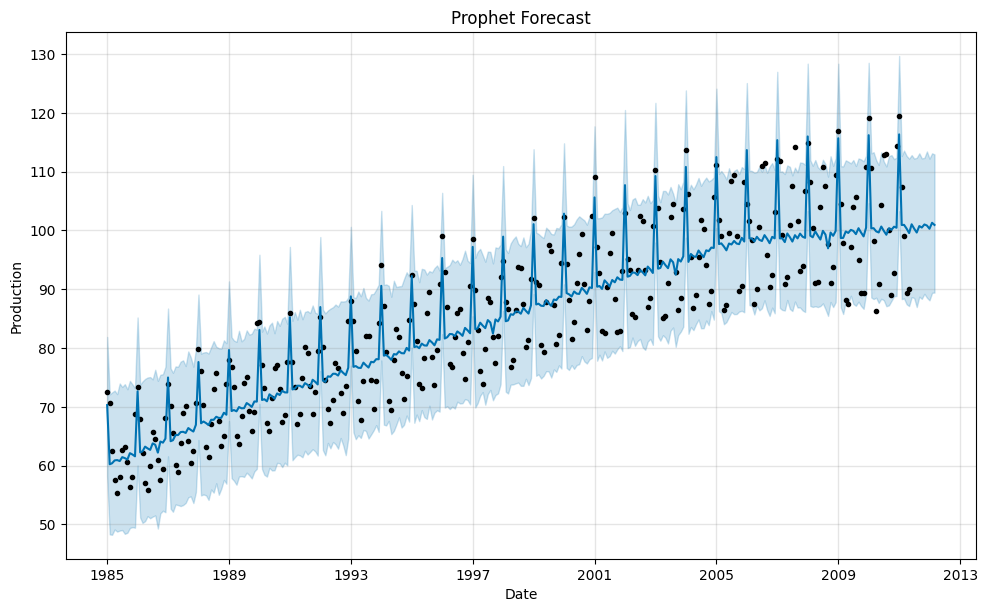

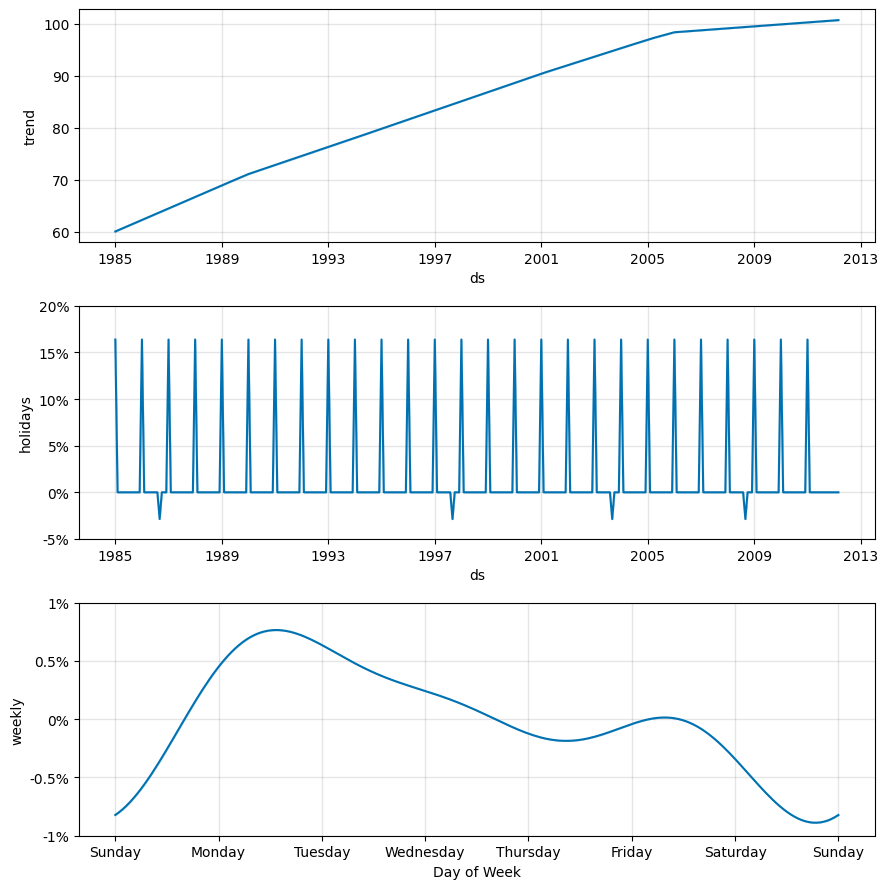

In [20]:
fig1 = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

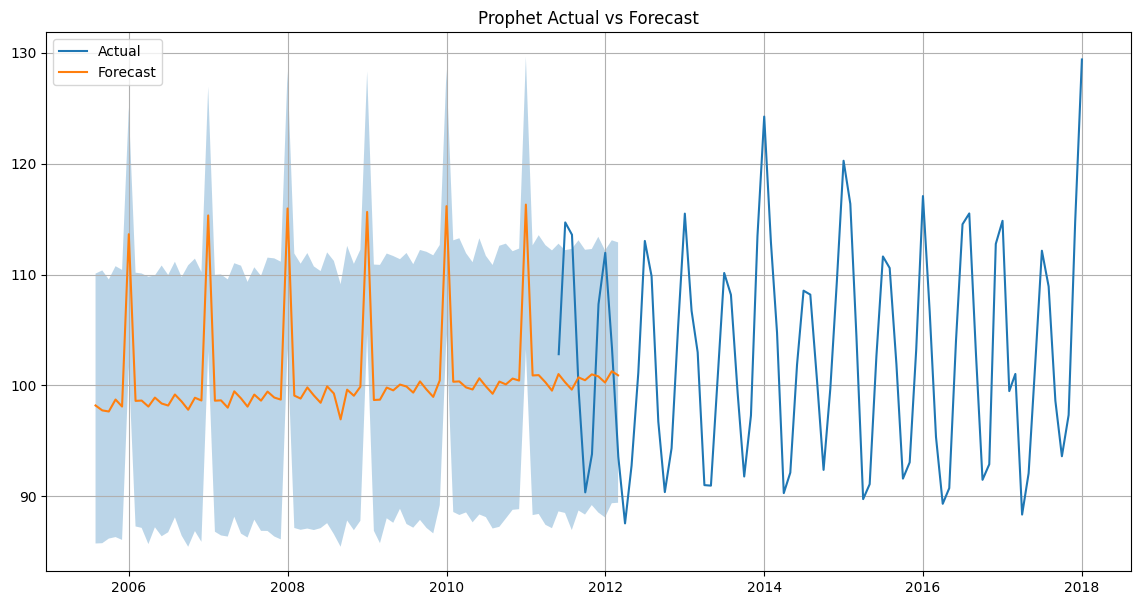

In [21]:
plt.figure(figsize=(14,7))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(pred['ds'], pred['yhat'], label='Forecast')
plt.fill_between(pred['ds'],
                forecast.tail(len(test))['yhat_lower'],
                forecast.tail(len(test))['yhat_upper'],
                alpha=0.3)
plt.title('Prophet Actual vs Forecast')
plt.legend()
plt.grid(True)
plt.show()